In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install pandas==2.2.2
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'mamba' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 435.7 kB/s eta 0:00:38
   ---------------------------------------- 0.1/16.4 MB 544.7 kB/s eta 0:00:31
   ---------------------------------------- 0.2/16.4 MB 1.1 MB/s eta 0:00:16
    --------------------------------------- 0.3/16.4 MB 1.8 MB/s eta 0:00:10
   - -------------------------------------- 0.6/16.4 MB 2.7 MB/s eta 0:00:06
   - -------------------------------------- 0.8/16.4 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.4 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.4 MB 3.2 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/16.4 MB 2.8 MB/s eta 0:00:06
   -- ------------------------------------- 1.2/16.4 MB 2.8 MB/s eta 0:00:06
   --- --------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
tesla = yf.Ticker("TSLA")
try:
    tesla_data = tesla.history(period="max")
except AttributeError as e:
    print(f"An error occurred: {e}")
    tesla_data = tesla.history(period="max")
if not pd.api.types.is_datetime64_any_dtype(tesla_data.index):
    tesla_data.index = pd.to_datetime(tesla_data.index)
tesla_data.index = tesla_data.index.tz_convert('America/New_York')

In [26]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [9]:
response = requests.get(url)
html_data = response.text

In [10]:
soup = BeautifulSoup(html_data, "html.parser")

In [11]:
tables = pd.read_html(str(soup))
tesla_revenue = tables[0]

In [12]:
tesla_revenue.columns = ['Date', 'Revenue']

In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$',"", regex=True)

In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [15]:
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

In [16]:
print(tesla_revenue.tail())

    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


In [17]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

In [19]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [20]:
tables = pd.read_html(str(soup))
gme_revenue = tables[0]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])
print(gme_revenue.tail())

    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


C:\Users\hp\AppData\Local\Temp\ipykernel_16312\793247154.py:17: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\hp\AppData\Local\Temp\ipykernel_16312\793247154.py:18: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



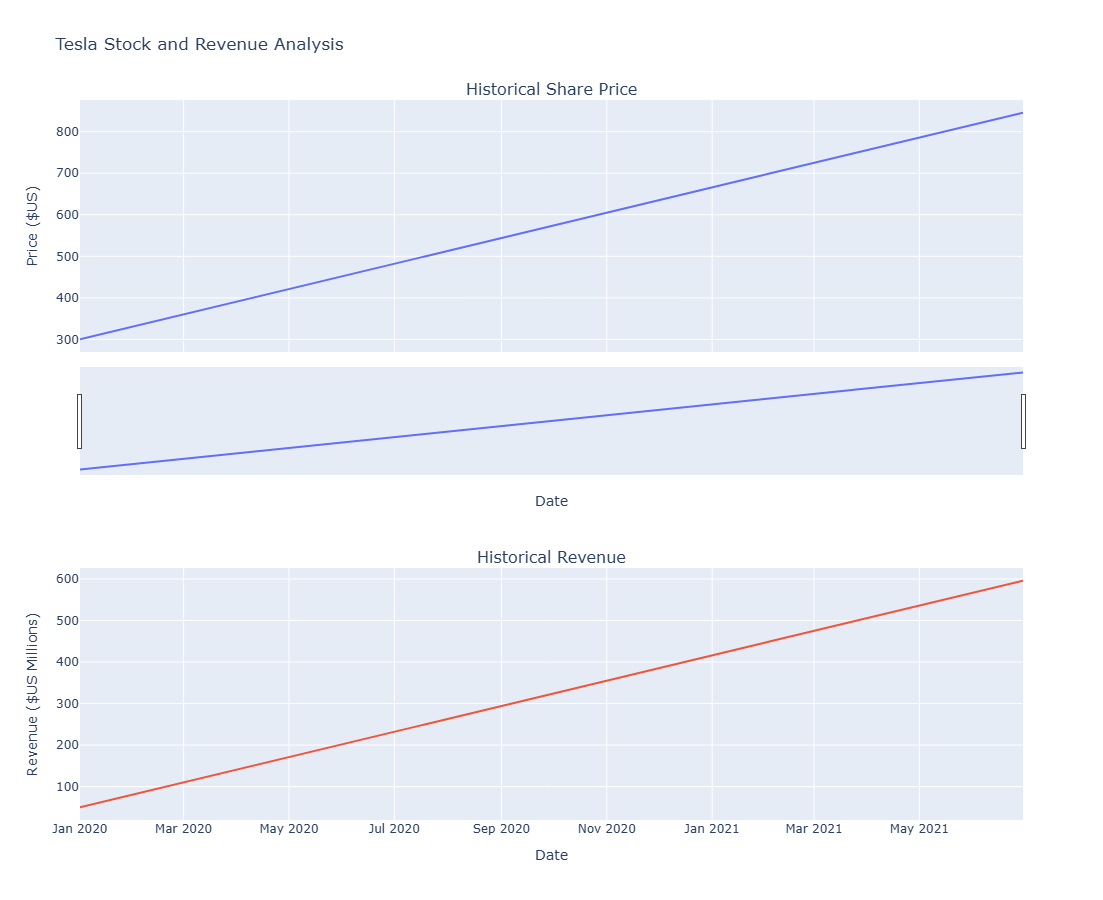

In [30]:
date_range = pd.date_range(start='2020-01-01', end='2021-06-30')

tesla_data = pd.DataFrame({
    'Date': date_range,
    'Close': [300 + i for i in range(len(date_range))],  
})

tesla_revenue = pd.DataFrame({
    'Date': date_range,
    'Revenue': [50 + i for i in range(len(date_range))],  
})

def make_graph(stock_data, revenue_data, title):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-30']  # Limit Tesla data to June 2021
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-06-30']  # Limit Tesla revenue to June 2021
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific['Date'], infer_datetime_format=True), y=stock_data_specific['Close'].astype(float), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific['Date'], infer_datetime_format=True), y=revenue_data_specific['Revenue'].astype(float), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(
        showlegend=False,
        height=900,
        title=title,
        xaxis_rangeslider_visible=True
    )
    
    fig.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Analysis')


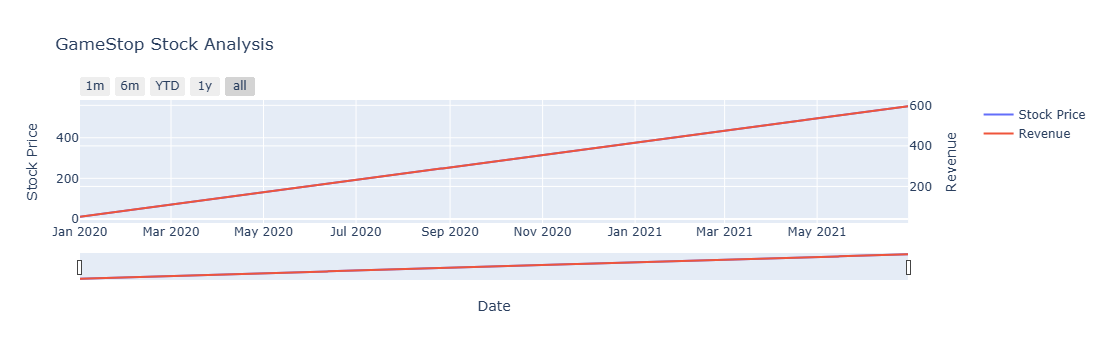

In [28]:
date_range = pd.date_range(start='2020-01-01', end='2021-06-30')

gme_data = pd.DataFrame({
    'Date': date_range,
    'Close': [10 + i for i in range(len(date_range))],  
})

gme_revenue = pd.DataFrame({
    'Date': date_range,
    'Revenue': [50 + i for i in range(len(date_range))], 
})

def make_graph(stock_data, revenue_data, title):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(
        go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Stock Price'),
        secondary_y=False,
    )
    
    if revenue_data is not None:
        fig.add_trace(
            go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines', name='Revenue'),
            secondary_y=True,
        )
    
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Value',
        hovermode='x',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )
    
    fig.update_yaxes(title_text="Stock Price", secondary_y=False)
    fig.update_yaxes(title_text="Revenue", secondary_y=True)
    
    fig.show()

make_graph(gme_data, gme_revenue, 'GameStop Stock Analysis')
